# Interactive inference

In [118]:
from models.single_policy import SinglePolicy
from single_agent import SingleAgent
from IPython.display import SVG, display, HTML
import torch
from torch import distributions
import pdb
import vh_graph
import gym
import envdataset
import utils_viz
import utils
import sys
from IPython.display import Image
sys.argv = ['-f'] 

In [3]:
curr_env = gym.make('vh_graph-v0')

In [4]:
ls

belief_example.gv.pdf  Digraph.gv.png               __pycache__/
dataset/               envdataset.py                README.md
dataset_subgoals2@     environment.py               single_agent.py
dataset_subgoals3@     graph_example.gv.pdf         test_belief.py
dataset_toy@           gt_graph.gv.pdf              Testing belief.ipynb
dataset_toy3@          Interactive inference.ipynb  trainer.py
dataset_toy4@          logdir/                      train_script.sh
data_subgoals_small/   models/                      utils.py
Digraph.gv             output_False.json            utils_viz.py
Digraph.gv.pdf         output_True.json             wide.png


In [5]:
weights = 'logdir/dataset_folder.dataset_toy4_pomdp.False_graphsteps.3_training_mode.bc/2019-11-12_21.33.57.388801/chkpt/chkpt_149.pt'

In [5]:
# Set up the policy
args = utils.read_args()
args.max_steps = 1
args.dataset_folder = 'dataset_toy4'
args.interactive = True
dataset_interactive = envdataset.EnvDataset(args, process_progs=False)
print('Starting model...')
policy_net = SinglePolicy(dataset_interactive).cuda()
policy_net = torch.nn.DataParallel(policy_net)
policy_net.eval()
if weights is not None:
    print('Loading weights')
    state_dict = torch.load(weights)
    policy_net.load_state_dict(state_dict['model_params'])

Getting objects from dataset_toy4/obj_names.json...
Starting model...
Loading weights


In [6]:

path_init_env = 'dataset_toy4/init_envs/TrimmedTestScene6_graph_40.json'
goal_name = {0:'(facing living_room[1] living_room[1])'}
curr_env.reset(path_init_env, goal_name)
curr_env.to_pomdp()
single_agent = SingleAgent(curr_env, goal_name, 0, dataset_interactive, policy_net)
gt_state = curr_env.vh_state.to_dict()

### Set the goal to find pencil 2026

In [7]:
id_agent = [x['id'] for x in gt_state['nodes'] if x['class_name'] == 'character'][0]
id_goal = 2026
goal_str = 'findnode_{}'.format(id_goal)


## View graph

Edges...


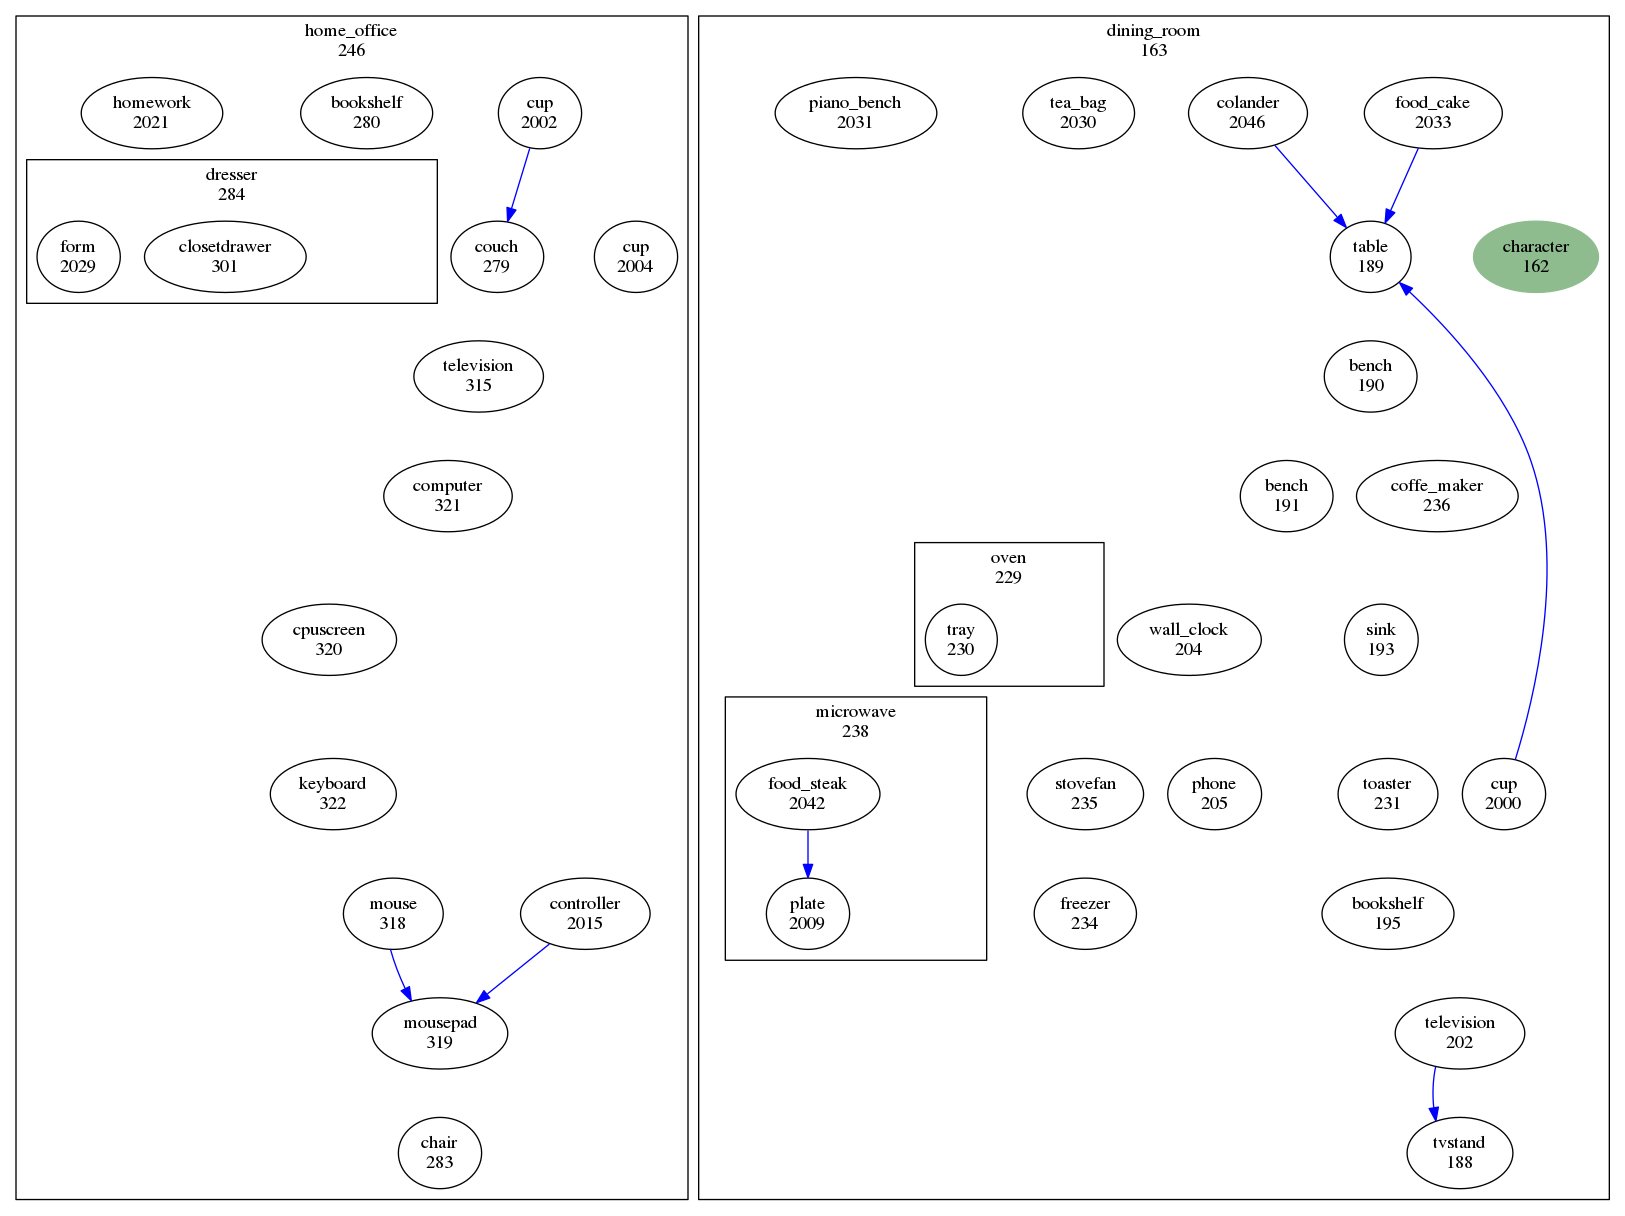

In [8]:
graph = utils_viz.graph2im(gt_state, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

### Explore the model

Edges...


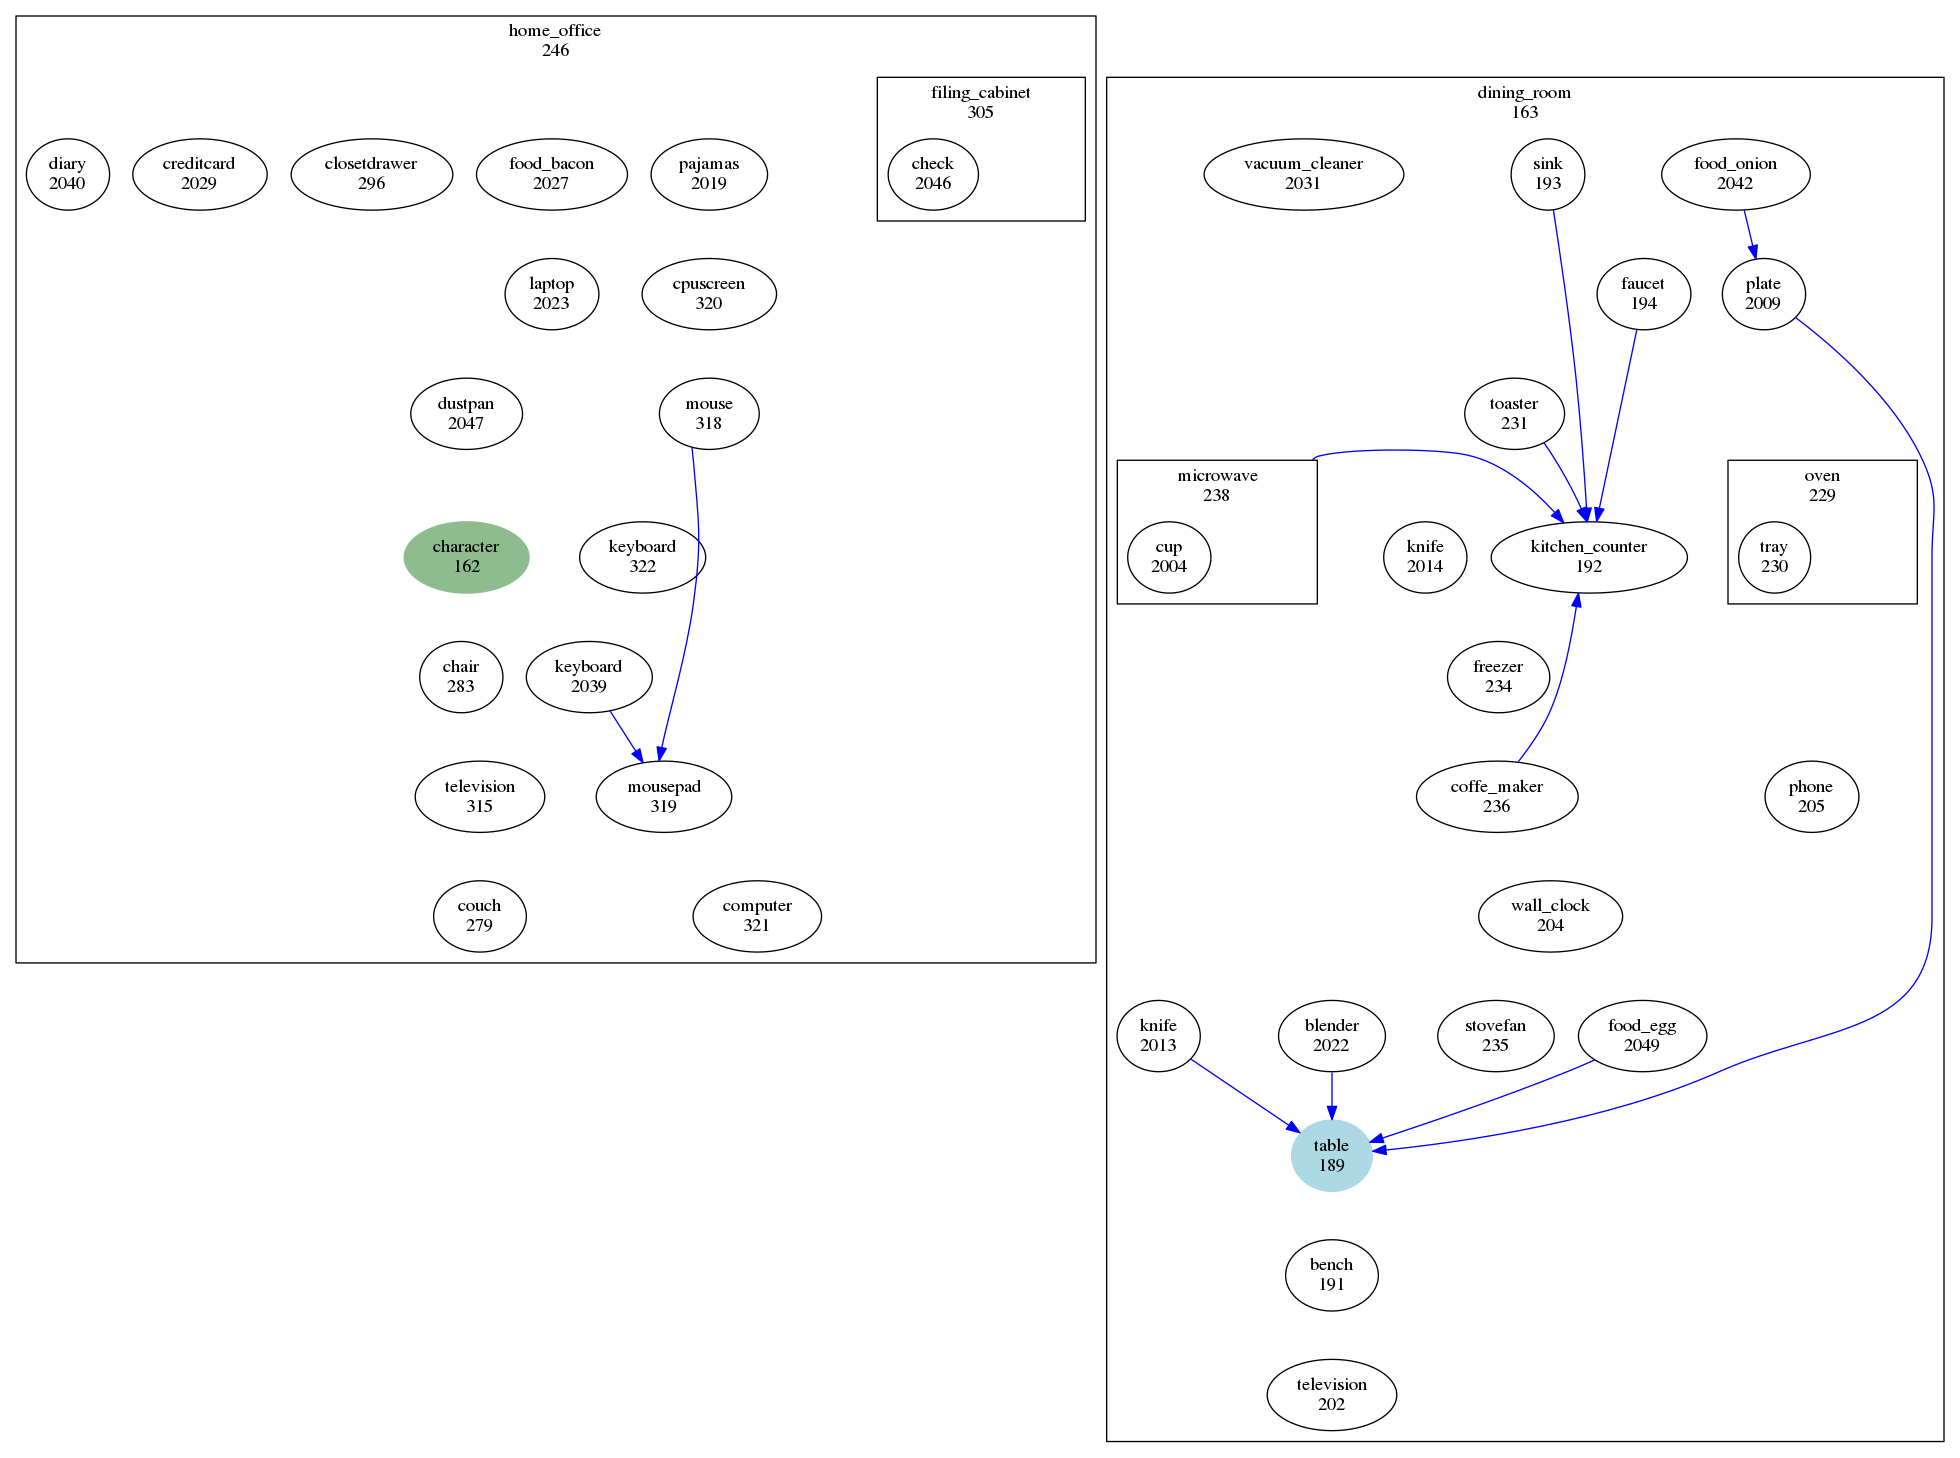

In [15]:
path_init_env = 'dataset_toy4/init_envs/TrimmedTestScene6_graph_45.json'

goal_name = {0:'(facing living_room[1] living_room[1])'}
curr_env.reset(path_init_env, goal_name)
curr_env.to_pomdp()
single_agent = SingleAgent(curr_env, goal_name, 0, dataset_interactive, policy_net)
gt_state = curr_env.vh_state.to_dict()


id_agent = [x['id'] for x in gt_state['nodes'] if x['class_name'] == 'character'][0]
id_goal = 189

goal_string = 'findnode_{}'.format(id_goal)
graph = utils_viz.graph2im(gt_state, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))


In [79]:
# POMDP
weights = 'logdir/dataset_folder.dataset_toy4_pomdp.True_graphsteps.3_training_mode.bc/2019-11-13_19.24.37.715547/chkpt/chkpt_149.pt'
single_agent.env.reset(path_init_env, goal_name)
single_agent.policy_net.load_state_dict(torch.load(weights)['model_params'])
goal_string = 'findnode_2046'

# curr_state['edges'].append({'relation_type': 'CLOSE', 'from_id':id_char ,'to_id': 229})
# curr_state['edges'].append({'relation_type': 'CLOSE', 'from_id':id_char ,'to_id': 230})
#curr_state['edges'] = [x for x in curr_state['edges'] if x['relation_type'] != 'CLOSE' or (x['from_id'] == id_char or x['to_id'] == id_char)]
pomdp = True
instr, _, r, _ = single_agent.rollout(goal_string, pomdp, None, 0., True)
print(instr)
print(r)

['[walk] <creditcard> (2029) ', '[walk] <dining_room> (163) ', '[walk] <home_office> (246) ', '[walk] <creditcard> (2029) ', '[walk] <dustpan> (2047) ', '[walk] <dining_room> (163) ', '[walk] <home_office> (246) ', '[walk] <creditcard> (2029) ', '[walk] <dining_room> (163) ', '[walk] <home_office> (246) ']
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [82]:

# FOMDP
args.max_steps = 15
single_agent.env.reset(path_init_env, goal_name)
weights = 'logdir/dataset_folder.dataset_toy4_pomdp.False_graphsteps.3_training_mode.pg/offp.False_eps.0.2_gamma.0.7/2019-11-14_00.45.32.080556/chkpt/chkpt_149.pt'
single_agent.policy_net.load_state_dict(torch.load(weights)['model_params'])
pomdp = False
instr, _, r, _ = single_agent.rollout(goal_string, pomdp, None, 0., True)
print(instr)
print(r)
# while step < nsteps and not finished:    
#     curr_state = single_agent.env.vh_state.to_dict()
#     visible_ids = single_agent.env.observable_object_ids_n[0]
#     graph_data, action_logits, o1_logits, o2_logits = single_agent.obtain_logits_from_observations(curr_state, visible_ids, goal_string)
#     instruction, _ = single_agent.sample_instruction(dataset_interactive, graph_data, action_logits, o1_logits, o2_logits, pick_max=True)
#     instr = list(zip(*instruction))[0]
#     str_instruction = utils.pretty_instr(instr)
#     print(str_instruction)
#     if 'stop' in str_instruction:
#         finished = True
#     else:
#         single_agent.env.step({0: str_instruction})
#     step += 1

['[walk] <dustpan> (2047) ', '[walk] <food_bacon> (2027) ', '[walk] <filing_cabinet> (305) ', '[open] <filing_cabinet> (305) ']
[-1, -1, -1, 5]


# Effect of belief

Getting objects from dataset_toy4/obj_names.json...
Starting model...
Edges...


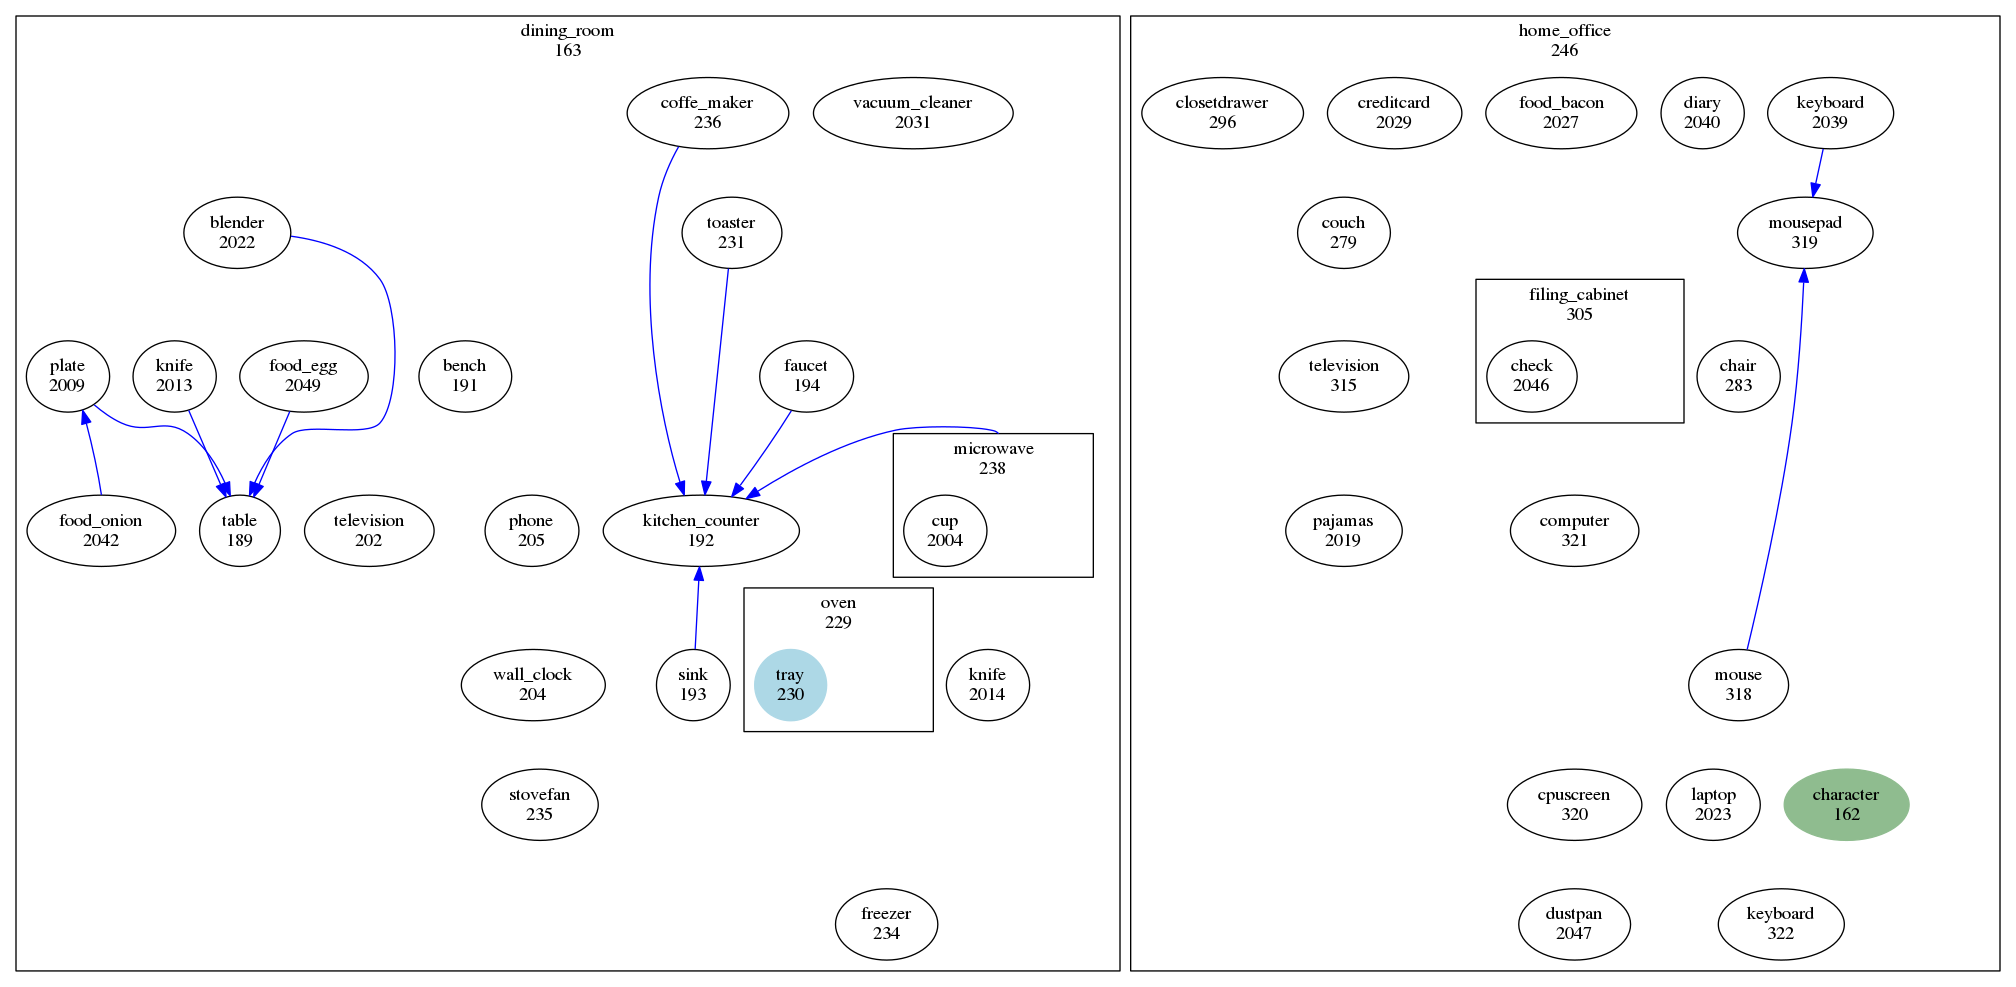

In [20]:
path_init_env = 'dataset_toy4/init_envs/TrimmedTestScene6_graph_45.json'
id_goal = 230
str_goal = 'findnode_{}'.format(id_goal)
id_agent = 162
args = utils.read_args()
args.max_steps = 1
args.dataset_folder = 'dataset_toy4'
args.interactive = True
dataset_interactive = envdataset.EnvDataset(args, process_progs=False)
print('Starting model...')
policy_net = SinglePolicy(dataset_interactive).cuda()
policy_net = torch.nn.DataParallel(policy_net)


goal_name = {0:'(facing living_room[1] living_room[1])'}
curr_env.reset(path_init_env, goal_name)
curr_env.to_pomdp()
single_agent = SingleAgent(curr_env, goal_name, 0, dataset_interactive, policy_net)
single_agent.env.reset(path_init_env, goal_name)
weights = 'logdir/dataset_folder.dataset_toy4_pomdp.False_graphsteps.3_training_mode.pg/offp.False_eps.0.2_gamma.0.7/2019-11-14_00.45.32.080556/chkpt/chkpt_149.pt'
single_agent.policy_net.load_state_dict(torch.load(weights)['model_params'])
single_agent.env.reset(path_init_env, goal_name)
gt_state = single_agent.env.vh_state.to_dict()
graph = utils_viz.graph2im(gt_state, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

## Correct belief

In [27]:
single_agent.env.reset(path_init_env, goal_name)
print(str_goal)
for i in range(5):
    curr_state = single_agent.env.vh_state.to_dict()
    visible_ids = single_agent.env.observable_object_ids_n[0]
    graph_data, action_logits, o1_logits, o2_logits = single_agent.obtain_logits_from_observations(
                curr_state, visible_ids, str_goal)
    instruction, logits = single_agent.sample_instruction(single_agent.dataset, graph_data,
                                                  action_logits, o1_logits, o2_logits)
    instr = list(zip(*instruction))[0]
    str_instruction = utils.pretty_instr(instr)
    print(str_instruction)
    resp = single_agent.env.step({0: str_instruction})

findnode_230
[walk] <computer> (321) 
[walk] <dining_room> (163) 
[walk] <oven> (229) 
[open] <oven> (229) 
[walk] <tray> (230) 


In [36]:
from vh_graph.envs import belief

### Wrong belief


In [158]:
single_agent.env.reset(path_init_env, goal_name)
print(str_goal)
gt_state = single_agent.env.vh_state.to_dict()

bel = belief.Belief(gt_state)
obs_graph = single_agent.get_observations()
bel.update_from_gt_graph(obs_graph)
new_graph = bel.sample_from_belief()
curr_state = new_graph

findnode_230


Edges...


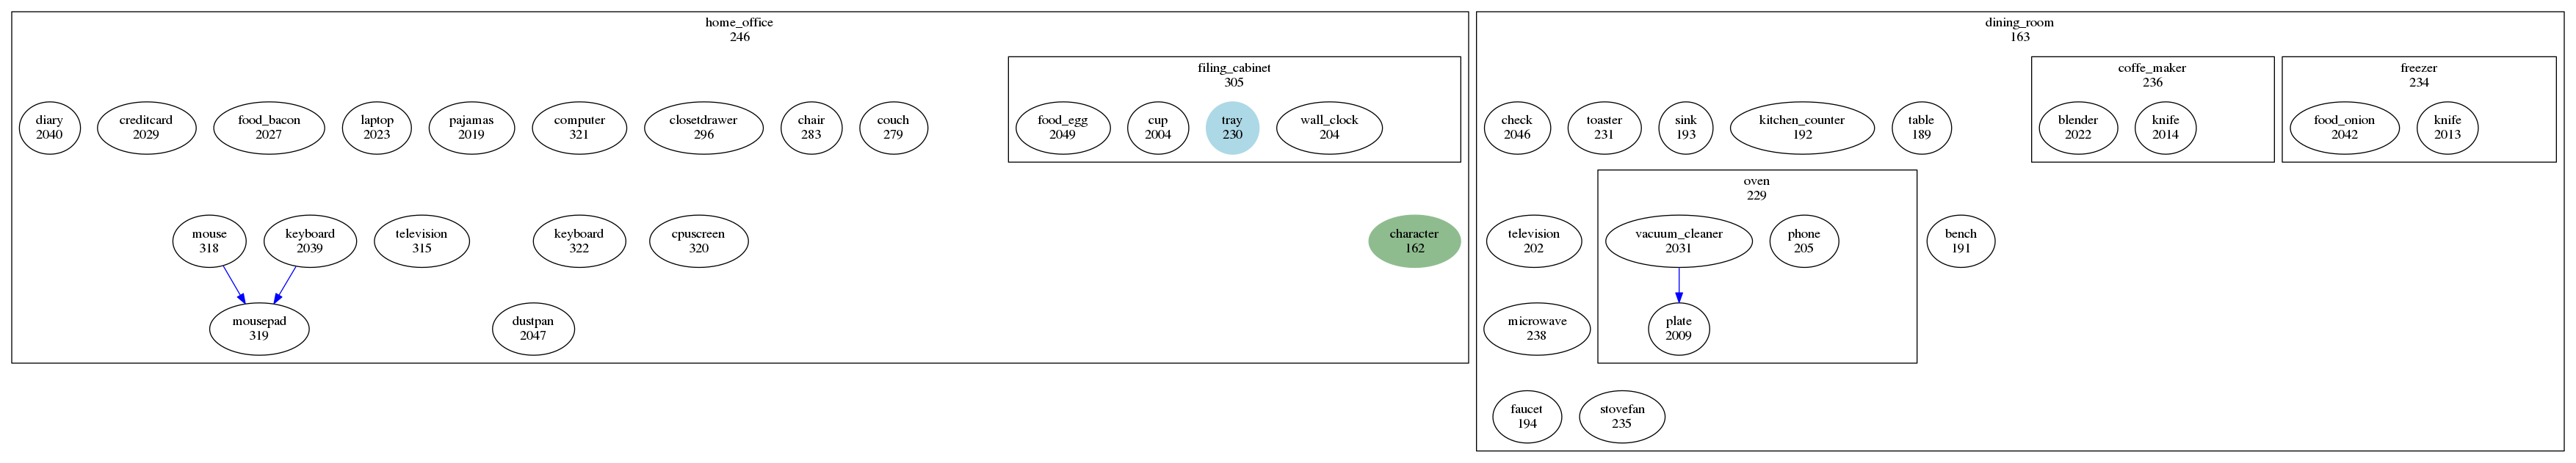

In [168]:
graph = utils_viz.graph2im(curr_state_save, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

In [162]:
visible_ids = single_agent.env.observable_object_ids_n[0]
curr_state = new_graph
graph_data, action_logits, o1_logits, o2_logits = single_agent.obtain_logits_from_observations(
                curr_state, visible_ids, str_goal)
instruction, logits = single_agent.sample_instruction(single_agent.dataset, graph_data,
                                              action_logits, o1_logits, o2_logits)
instr = list(zip(*instruction))[0]
str_instruction = utils.pretty_instr(instr)
print(str_instruction)

[walk] <filing_cabinet> (305) 


Edges...


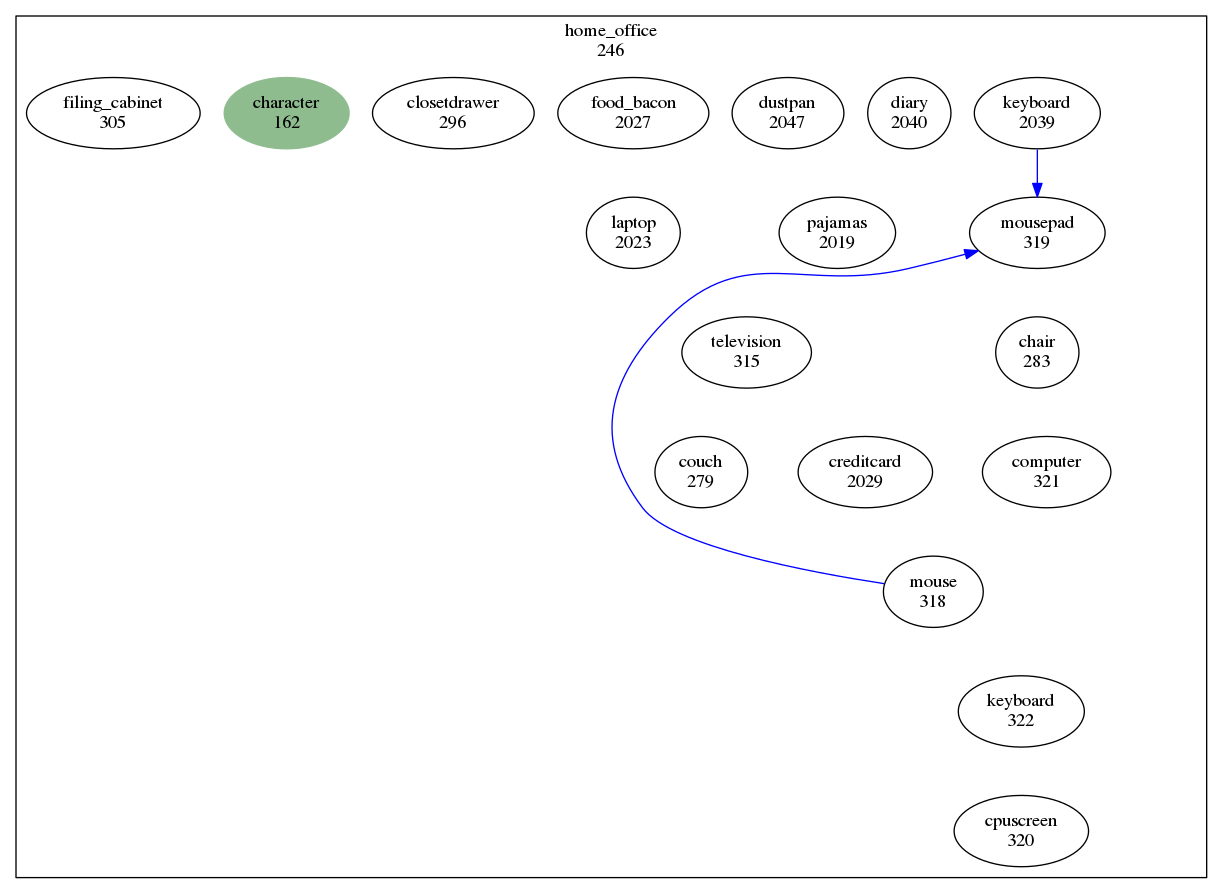

In [163]:
obs_graph = single_agent.get_observations()
#print(obs_graph)
graph = utils_viz.graph2im(obs_graph, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

Edges...
CLOSE_CHAR


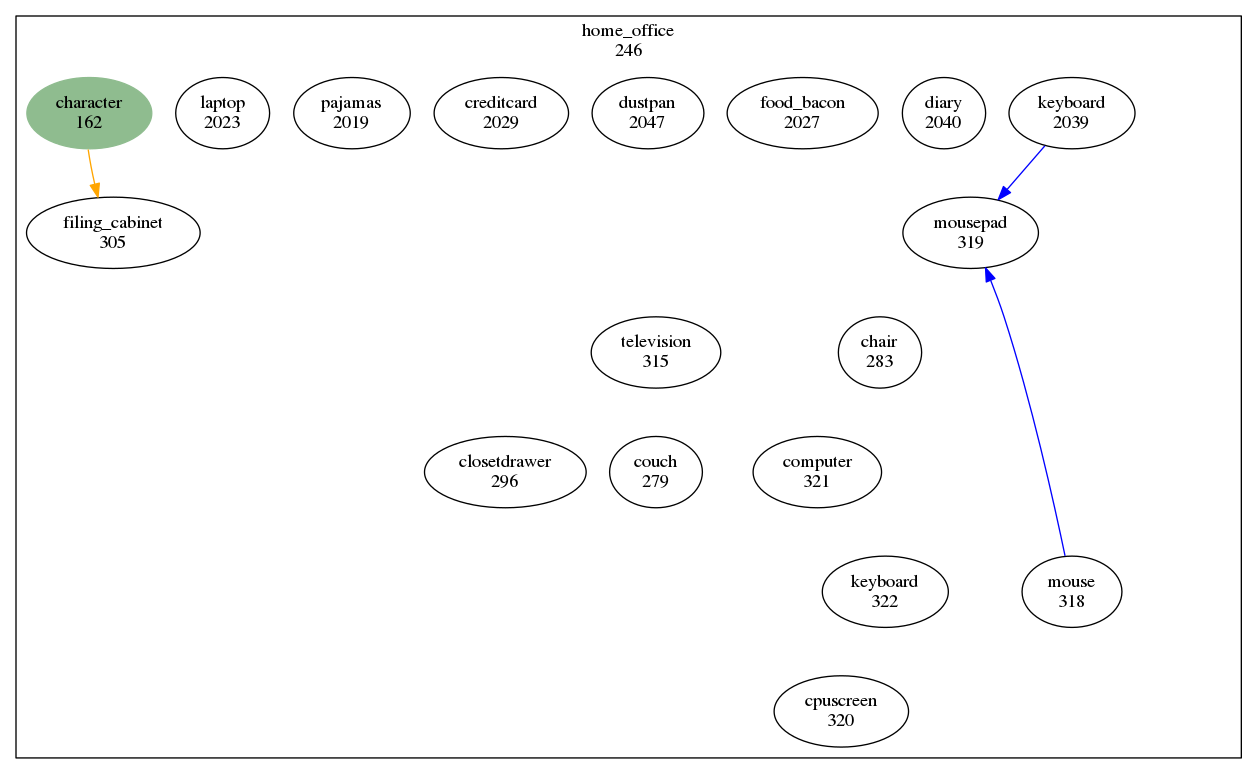

In [164]:
resp = single_agent.env.step({0: str_instruction})
obs_graph = single_agent.get_observations()
#print(obs_graph)
graph = utils_viz.graph2im(obs_graph, {id_goal: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))
import copy
curr_state_save = copy.deepcopy(curr_state)

In [193]:
curr_state = bel.update_graph_from_gt_graph(curr_state, obs_graph)

DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE


In [199]:
[x for x in curr_state['nodes'] if x['id'] == 189]

[{'id': 189,
  'class_name': 'table',
  'category': 'Furniture',
  'properties': ['MOVABLE', 'SURFACES'],
  'states': [],
  'prefab_name': None,
  'bounding_box': None,
  'state': []}]

In [196]:
curr_state = copy.deepcopy(curr_state_save)

### Multiple step rollout

In [ ]:
def one_step_rollout(env, goal_string, pomdp):
    if pomdp:
        curr_state = single_agent.get_observations()
        visible_ids = None
    else:
        curr_state = single_agent.env.vh_state.to_dict()
        visible_ids = single_agent.env.observable_object_ids_n[0]
    
    graph_data, action_logits, o1_logits, o2_logits = single_agent.obtain_logits_from_observations(curr_state, visible_ids, goal_string)
    instruction, logits = single_agent.sample_instruction(dataset_interactive, graph_data, 
                                                          action_logits, o1_logits, o2_logits, pick_max=True)
    #instruction = single_agent.get_top_instruction(dataset_interactive, graph_data, action_logits, o1_logits, o2_logits)
    logits = None
    instr = list(zip(*instruction))[0]
    str_instruction = utils.pretty_instr(instr)
    if 'stop' in str_instruction:
            return None, str_instruction, logits
    resp = single_agent.env.step({0: str_instruction})
    return resp, str_instruction, logits

In [ ]:
args.pomdp = False
weights = 'logdir/dataset_folder.dataset_toy3_pomdp.False_graphsteps.3/2019-11-06_09.14.31.202175/chkpt/chkpt_49.pt'
state_dict = torch.load(weights)
single_agent.policy_net.load_state_dict(state_dict['model_params'])

curr_env.reset(path_init_env, goal_name)
max_instr = 0
instr = ''
goal_str = 'findnode_315'
while max_instr < 10 and 'stop' not in instr:
    a = one_step_rollout(single_agent.env, goal_str, args.pomdp)
    instr = a[1]
    max_instr += 1
    print(instr)

In [ ]:
curr_env.reset(path_init_env, goal_name)
max_instr = 0
instr = ''
goal_str = 'findnode_301'
while max_instr < 10 and 'stop' not in instr:
    a = one_step_rollout(single_agent.env, goal_str, args.pomdp)
    instr = a[1]
    max_instr += 1
    print(instr)

### Back to non POMDP

In [ ]:
%autoreload 2

In [ ]:

path_init_env = "dataset_toy3/init_envs/TrimmedTestScene6_graph_28.json"
goal_name = '(facing living_room[1] living_room[1])'
curr_env.reset(path_init_env, {0: goal_name})
curr_env.to_pomdp()
single_agent = SingleAgent(curr_env, goal_name, 0, dataset_interactive, policy_net)

# Starting the scene
curr_state = single_agent.get_observations()
gt_state = single_agent.env.vh_state.to_dict()

# All the nodes
nodes, _, ids_used = dataset_interactive.process_graph(gt_state)
class_names, object_ids, _, mask_nodes, _ = nodes

In [ ]:
graph = utils_viz.graph2im(gt_state, {320: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

In [ ]:
args.pomdp = False
weights = 'logdir/dataset_folder.dataset_toy3_pomdp.False_graphsteps.3/2019-11-06_09.14.31.202175/chkpt/chkpt_49.pt'
state_dict = torch.load(weights)
single_agent.policy_net.load_state_dict(state_dict['model_params'])
curr_env.reset(path_init_env, {0:goal_name})
max_instr = 0
instr = ''
goal_str = 'findnode_320'
while max_instr < 10 and 'stop' not in instr:
    a = one_step_rollout(single_agent.env, goal_str, args.pomdp)
    instr = a[1]
    max_instr += 1
    print(instr)

In [ ]:
args.pomdp = True
weights = 'logdir/dataset_folder.dataset_toy3_pomdp.True_graphsteps.3/2019-11-06_09.13.35.555005/chkpt/chkpt_49.pt'
state_dict = torch.load(weights)
single_agent.policy_net.load_state_dict(state_dict['model_params'])
curr_env.reset(path_init_env, {0:goal_name})
max_instr = 0
instr = ''
goal_str = 'findnode_320'
while max_instr < 10 and 'stop' not in instr:
    a = one_step_rollout(single_agent.env, goal_str, args.pomdp)
    instr = a[1]
    max_instr += 1
    print(instr)

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

> /data/vision/torralba/frames/data_acquisition/SyntheticStories/MultiAgent/vh_multiagent_models/utils_viz.py(110)graph2im()
-> if curr_subgraph_id not in parent:
(Pdb) c
Edges...
CLOSE_CHAR
CLOSE_CHAR


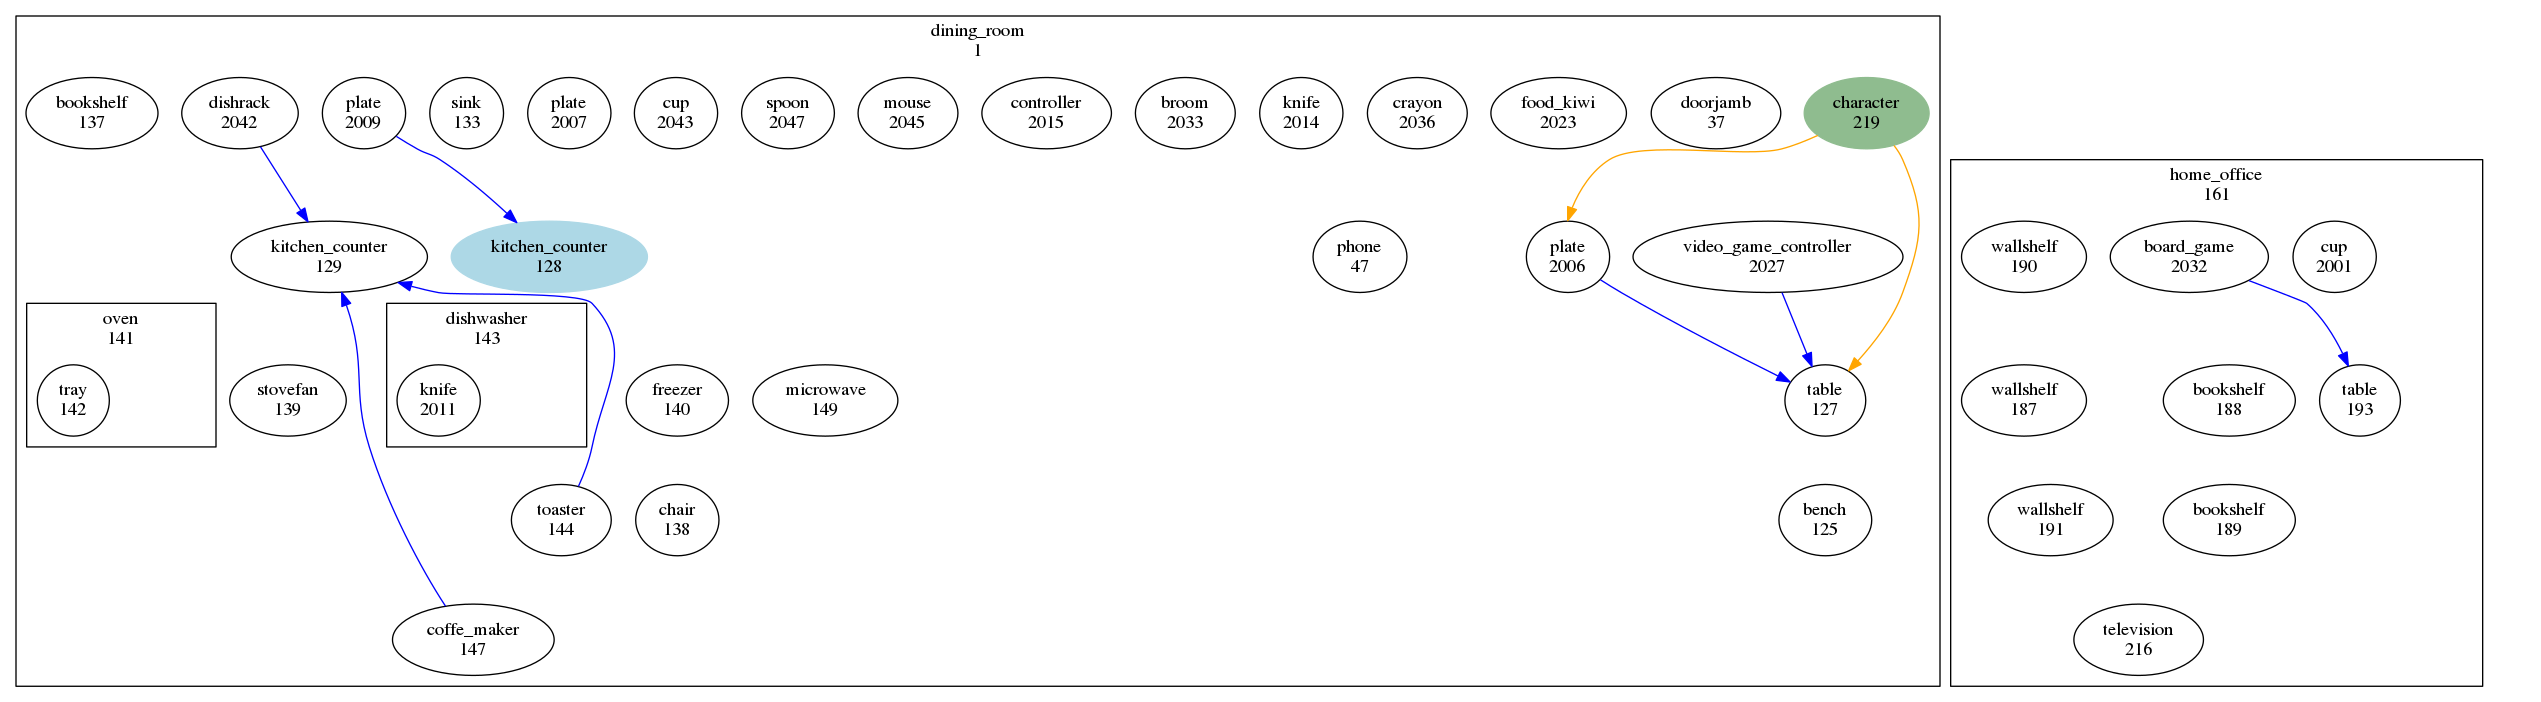

In [17]:
import json
time = 2
goal_name = '(facing living_room[1] living_room[1])'
with open('dataset_toy4/init_envs/TrimmedTestScene3_graph_31_multiple_21.json', 'r') as f:
    graph_multiple = json.load(f)

gt_state = graph_multiple[time][1]
id_agent = [x['id'] for x in gt_state['nodes'] if x['class_name'] == 'character'][0]
graph = utils_viz.graph2im(gt_state, {128: 'goal', id_agent: 'agent'})
graph.format = 'png'
tmp = graph.view()
display(Image(tmp))

In [15]:
reload(utils_viz)

NameError: name 'reload' is not defined

In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
bel.update_from_gt_graph

<bound method Belief.update_from_gt_graph of <vh_graph.envs.belief.Belief object at 0x7f6b3820f518>>